<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml
!pip install lxml

In [6]:
# Abra o arquivo estados-bruto.xml utilizando o analisador XML chamado lxml

from bs4 import BeautifulSoup
import lxml
import xml.etree.ElementTree as ET

with open("estados-bruto.xml",'r',encoding='utf-8') as arquivo:
 xml = arquivo.read()
 pagina = BeautifulSoup(xml,'xml')
 root = ET.fromstring(xml)

In [7]:
# visualize os resultados

print(pagina)

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [8]:
# manipule os dados

# continuação do código

import pandas as pd
from tables.index import Index
ids = []
nomes = []
idcapitais = []
siglas = []
regioes = []

# Itere sobre os elementos ESTADO
for estado in root.findall('ESTADO'):
    ids.append(estado.find('ID').text)
    nomes.append(estado.find('NOME').text)
    idcapitais.append(estado.find('IDCAPITAL').text)
    siglas.append(estado.find('SIGLA').text)
    regioes.append(estado.find('REGIAO').text)

# Crie um DataFrame com os dados
data = {'ID': ids, 'NOME': nomes, 'IDCAPITAL': idcapitais, 'SIGLA': siglas, 'REGIAO': regioes}
df_extraido = pd.DataFrame(data)

# Exiba o DataFrame
print(df_extraido.to_string(index=False))

ID                NOME IDCAPITAL SIGLA       REGIAO
 1                ACRE        16    AC        NORTE
 2             ALAGOAS        68    AL     NORDESTE
 3               AMAPA       131    AP        NORTE
 4            AMAZONAS       178    AM        NORTE
 5               BAHIA       536    BA     NORDESTE
 6               CEARA       676    CE     NORDESTE
 7    DISTRITO FEDERAL       916    DF CENTRO-OESTE
 8      ESPIRITO SANTO       879    ES      SUDESTE
 9               GOIAS       973    GO CENTRO-OESTE
10            MARANHAO      1309    MA     NORDESTE
11         MATO GROSSO      1374    MT CENTRO-OESTE
12  MATO GROSSO DO SUL      1485    MS CENTRO-OESTE
13                PARA      1561    PA        NORTE
14             PARAIBA      1779    PB     NORDESTE
15              PARANA      2002    PR          SUL
16          PERNAMBUCO      2439    PE     NORDESTE
17               PIAUI      2704    PI     NORDESTE
18      RIO DE JANEIRO      2779    RJ      SUDESTE
19 RIO GRAND

In [52]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continuação do código
estados_df = df_extraido.rename(columns={'ID':'id','NOME':'estado', 'IDCAPITAL':'id_capital','SIGLA':'sigla','REGIAO':'regiao'}) #renomeando colunas
estados_df.to_csv(path_or_buf=NOME_ARQUIVO_DESTINO, sep=';', index=False) # escrevendo arquivo csv com Pandas

estados_df.to_csv(NOME_ARQUIVO_DESTINO,sep=';',index=False)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [17]:
# Carregue o arquivo cidades-bruto.csv utilizando o pandas

import pandas as pd

arquivo_fonte= 'cidades-bruto.csv'
df_arquivo_fonte = pd.read_csv(arquivo_fonte)
print(type(df_arquivo_fonte))
print(df_arquivo_fonte.head(10))

<class 'pandas.core.frame.DataFrame'>
                                               FID   gid                 UF  \
0  vw_pib_percapita.fid-4514e25a_17aaa325034_-258f   215              BAHIA   
1  vw_pib_percapita.fid-4514e25a_17aaa325034_-258e   306  RIO GRANDE DO SUL   
2  vw_pib_percapita.fid-4514e25a_17aaa325034_-258d   900     ESPIRITO SANTO   
3  vw_pib_percapita.fid-4514e25a_17aaa325034_-258c  3613       MINAS GERAIS   
4  vw_pib_percapita.fid-4514e25a_17aaa325034_-258b  1028              PIAUÍ   
5  vw_pib_percapita.fid-4514e25a_17aaa325034_-258a  3403       MINAS GERAIS   
6  vw_pib_percapita.fid-4514e25a_17aaa325034_-2589  1029              PIAUÍ   
7  vw_pib_percapita.fid-4514e25a_17aaa325034_-2588  5153              PIAUÍ   
8  vw_pib_percapita.fid-4514e25a_17aaa325034_-2587  1048              GOIÁS   
9  vw_pib_percapita.fid-4514e25a_17aaa325034_-2586  2629         PERNAMBUCO   

           nome   Censo           PIB  Pop_est_2009  PIB_percapita  \
0      Tremedal  2010.

In [18]:
# visualize os resultados

nome_especifico = 2010.0
# dados_sexo_masculino = df_arquivo_fonte.loc[df_arquivo_fonte['UF'] == nome_especifico, ['UF', 'nome']]
colunas_selecionadas = ['Censo','UF','nome','Pop_est_2009','PIB','PIB_percapita']
dados_censo_2010 = df_arquivo_fonte.loc[df_arquivo_fonte['Censo'] == nome_especifico,colunas_selecionadas]
# Exiba as linhas com o nome específico
dados_censo_2010.head(10)
# continue o codigo aqui

,Censo,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,2010.0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,2010.0,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,2010.0,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,2010.0,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,2010.0,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
5,2010.0,MINAS GERAIS,Pedra Azul,26000,1.875237e+05,7212.450195
6,2010.0,PIAUÍ,Teresina,802537,8.700461e+06,10841.200195
7,2010.0,PIAUÍ,Amarante,17892,6.532289e+04,3650.949951
8,2010.0,GOIÁS,Matrinchã,4420,4.591055e+04,10387.000000
9,2010.0,PERNAMBUCO,Cachoeirinha,18123,8.043380e+04,4438.220215


In [19]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.8 MB/s eta 0:00:00


In [53]:
# Salve os dados processados no arquivo cidades-limpo.csv, utilizando ponto e vírgula (;) como separador.

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

from unidecode import unidecode

dados_censo_2010 = dados_censo_2010.rename(columns={'UF':'estado', 'nome': 'cidade', 'Pop_est_2009': 'populacao', 'PIB':'pib', 'PIB_percapita': 'pib_percapita'}) #renomenado colunas
dados_censo_2010['estado'] = dados_censo_2010['estado'].apply(unidecode)
dados_censo_2010.to_csv(NOME_ARQUIVO_DESTINO,sep=';',index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [46]:
!pip install unidecode

In [55]:
# RESOLUÇÃO

import pandas as pd

estados_df = pd.read_csv('estados-limpo.csv', delimiter=';')
cidades_df = pd.read_csv('cidades-limpo.csv', delimiter=';')

df_combined = pd.concat([estados_df, cidades_df], ignore_index=True)

df_combined.to_csv('brasil.csv', index=False)

estados_df = estados_df.rename(columns = {'nome':'estado'})

cidades_df = cidades_df.rename(columns = {'UF':'estado'})

mapeamento_estados = {
    'RIO GRANDE DO SUL': 'RIO GRANDE DO SUL',
    'ESPIRITO SANTO': 'ESPIRITO SANTO',
    'MINAS GERAIS': 'MINAS GERAIS',
    'PIAUÍ': 'PIAUI',
    'GOIÁS': 'GOIAS',
    'PERNAMBUCO': 'PERNAMBUCO',
    'PARÁ': 'PARA',
    'SERGIPE': 'SERGIPE',
    'SÃO PAULO': 'SAO PAULO',
    'PARAÍBA': 'PARAIBA',
    'TOCANTINS': 'TOCANTINS',
    'AMAZONAS': 'AMAPA',
    'SANTA CATARINA': 'SANTA CATARINA',
    'CEARÁ': 'CEARA',
    'RORAIMA': 'RORAIMA',
    'MARANHÃO': 'MARANHAO',
    'RIO DE JANEIRO': 'RIO DE JANEIRO',
    'MATO GROSSO': 'MATO GROSSO',
    'PARANÁ': 'PARANA',
    'ALAGOAS': 'ALAGOAS',
    'MATO GROSSO DO SUL': 'MATO GROSSO DO SUL',
    'ACRE': 'ACRE',
    'RIO GRANDE DO NORTE': 'RIO GRANDE DO NORTE',
    'RONDÔNIA': 'RONDONIA',
    'AMAPÁ': 'AMAPA',
    'DISTRITO FEDERAL': 'DISTRITO FEDERAL'
}

cidades_df['estado'] = cidades_df['estado'].replace(mapeamento_estados)

brasil_df = pd.merge(left=cidades_df, right=estados_df, on="estado", how="inner")

brasil_df.to_csv('brasil.csv', sep=';', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [57]:
# solução do exercício 2.1


brasil_df = pd.read_csv('brasil.csv', sep=';', encoding='utf8')
brasil_df.head()

,Censo,estado,cidade,populacao,pib,pib_percapita,id,id_capital,sigla,regiao
0,2010.0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,5,536,BA,NORDESTE
1,2010.0,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727,20,3273,RS,SUL
2,2010.0,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844,8,879,ES,SUDESTE
3,2010.0,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961,27,4790,MG,SUDESTE
4,2010.0,PIAUI,Nazária,7895,2.095138e+04,2653.750000,17,2704,PI,NORDESTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [58]:
# código para responder a pergunta

brasil_df.nlargest(10, 'populacao')[['cidade', 'populacao']]

,cidade,populacao
4921,São Paulo,11037593
785,Rio de Janeiro,6186710
519,Salvador,2998056
3070,Brasília,2606885
4523,Fortaleza,2505552
4871,Belo Horizonte,2452617
1812,Curitiba,1851215
333,Manaus,1738641
3542,Recife,1561659
5219,Belém,1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [61]:
# código para responder a pergunta

df_nordeste = (brasil_df.loc[brasil_df['regiao'] == 'NORDESTE'])
df_nordeste.nsmallest(5, ['pib_percapita'])[['cidade', 'pib_percapita']]

,cidade,pib_percapita
4784,São Vicente Ferrer,1929.969971
2239,Cajapió,2203.830078
103,Dom Inocêncio,2358.239990
5380,Timbiras,2368.159912
2852,Axixá,2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [62]:
# código para responder a pergunta

df_saopaulo = (brasil_df.loc[brasil_df['estado'] == 'SAO PAULO'])
df_saopaulo.nlargest(15, ['pib'])[['cidade', 'pib']]

,cidade,pib
4921,São Paulo,389317152.0
4450,Guarulhos,32473828.0
5425,Campinas,31654720.0
3426,Osasco,31616452.0
979,São Bernardo do Campo,28935768.0
5456,Barueri,26908070.0
576,Santos,22546134.0
2509,São José dos Campos,22018042.0
2704,Jundiaí,16585137.0
1027,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [64]:
# código para responder a pergunta

df_sc = (brasil_df.loc[brasil_df['estado'] == 'SANTA CATARINA'])
soma = df_sc['pib'].sum()
print(soma)

129806256.75195317


 - Qual é o população da região sul?

In [66]:
# código para responder a pergunta

df_populacao_sul = (brasil_df.loc[brasil_df['regiao'] == 'SUL'])
soma_populacao = df_populacao_sul['populacao'].sum()
print(f'A populacaço da regiao sul é de {soma_populacao} habitantes')

A populacaço da regiao sul é de 27719118 habitantes


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [67]:
# código para responder a pergunta

pib_ms = (brasil_df.loc[brasil_df['estado'] == 'MATO GROSSO DO SUL'])
pib_medio = pib_ms['pib_percapita'].sum() / 8
print(pib_medio)

140974.24438476254


 - Qual é a população do Brasil?

In [69]:
# código para responder a pergunta

populacao_brasil = brasil_df['populacao'].sum()
print(populacao_brasil)

191176146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

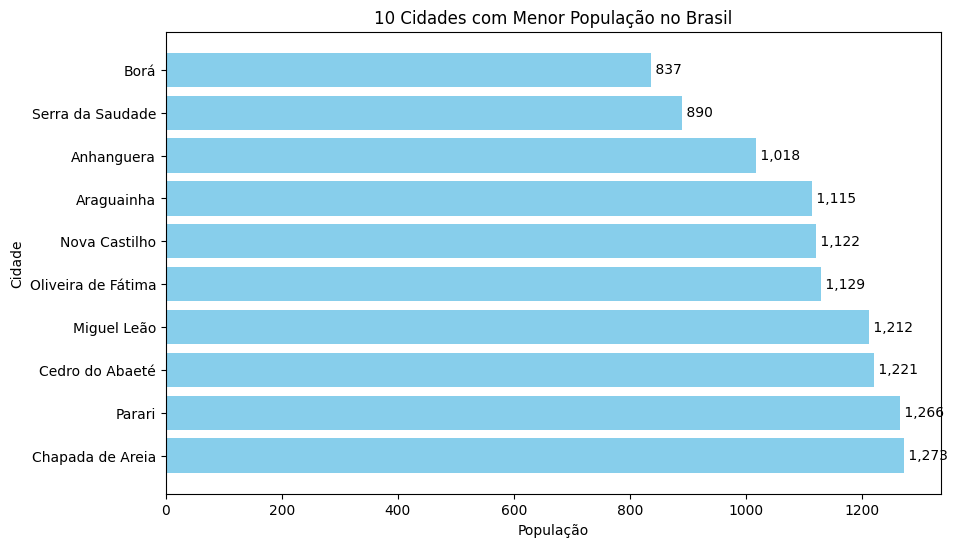

In [72]:
# código para gerar a visualização

import matplotlib.pyplot as plt
import altair as alt
# Filtrando as 10 cidades com menor população
cidades_min = brasil_df.nsmallest(10, 'populacao')[['cidade', 'populacao']]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))  # Ajustando o tamanho da figura
plt.barh(cidades_min['cidade'], cidades_min['populacao'], color='skyblue')

# Adicionando título e rótulos dos eixos
plt.title('10 Cidades com Menor População no Brasil')
plt.xlabel('População')
plt.ylabel('Cidade')

# Invertendo a ordem das cidades no eixo Y para que a cidade com menor população fique no topo
plt.gca().invert_yaxis()

# Mostrando os valores em cada barra
for index, value in enumerate(cidades_min['populacao']):
    plt.text(value, index, f' {value:,.0f}', va='center')

# Mostrando o gráfico
plt.show()

 - Gere um gráfico de Barra com a proporção da população do Brasil por região.

Visualização

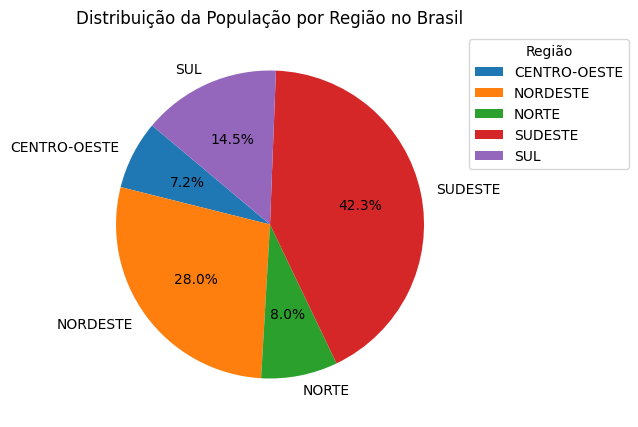

In [73]:
# código para gerar a visualização

# Agrupando e somando a população por região
df_agrupado = brasil_df[['regiao', 'populacao']].groupby('regiao').agg('sum')

# Definindo cores populares e agradáveis para o gráfico
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Criando o gráfico de pizza com as cores definidas
plt.figure(figsize=(5, 5))
plt.pie(df_agrupado['populacao'], labels=df_agrupado.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Distribuição da População por Região no Brasil')

# Ajustando a legenda para maior clareza
plt.legend(title='Região', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrando o gráfico
plt.show()